In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from highlight_text import fig_text

pd.options.display.max_columns = 500
%matplotlib inline

In [2]:
path = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\'

In [4]:
df = pd.read_csv(f"{path}Final FBRef 2022-2023.csv")

In [20]:
midfielder = df[(df['Main Position'].str.contains('Defensive Midfield')) | 
                (df['Main Position'].str.contains('Attacking Midfield')) |
                (df['Main Position'].str.contains('Central Midfield'))]

midfielder = midfielder[["Player","Pos", "Main Position", "Squad", "ShortPassCmp%", "MedPassCmp%", "LongPassCmp%",
                   "KeyPasses", 'xA','Assists', 'SCA', 'GCA', 'ProgPasses','pAdjIntPer90', 'pAdjDrbTklPer90']].reset_index(drop=True)

In [16]:
bgColor = "lightgrey"
playerColor = "#0052CC"

In [21]:
params = list(midfielder.columns)
params = params[4:]

In [22]:
def playerChart(playerName, save=False):
    player = midfielder.loc[midfielder["Player"]== playerName].reset_index()
    player = list(player.loc[0])
    player = player[5:]
    

    values = []
    for x in range(len(params)):
        values.append(math.floor(stats.percentileofscore(midfielder[params[x]],player[x])))

    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color=bgColor,     # background color
        straight_line_color="#222222",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        last_circle_color="#222222",    # color of last circle
        other_circle_ls="-.",           # linestyle for other circles
        other_circle_lw=1               # linewidth for other circles
)

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                     # list of values
    
        figsize=(8, 8),             # adjust figsize according to your need
        kwargs_slices=dict(
            facecolor=playerColor, edgecolor="#222222",
            zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    
        kwargs_params=dict(
            color="#000000", fontsize=10.5,
             va="center"
    ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
             zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
        kwargs_compare_values=dict(
            color="#000000", fontsize=12,  zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

    # add title
    fig_text(
        0.515, 0.99, f"<{playerName}>", size=25, fig=fig,
        highlight_textprops=[{"color": playerColor}],
        ha="center", color="#000000"
)


    # add subtitle
    fig.text(
        0.515, 0.930,
        "Percentile Rank vs Top 5 midfielder | Season 2022-23",
        size=15,
        ha="center",  color="#000000"
)

    # add credits
    CREDIT_1 = "data: Opta viz fbref"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
         color="#000000",
        ha="right"
)

    if save ==True:
        plt.savefig(f'viz/{playerName} Chart vs Premier League Midfielders 2022-23', dpi=300, bbox_inches='tight')
    else:
        plt.show()

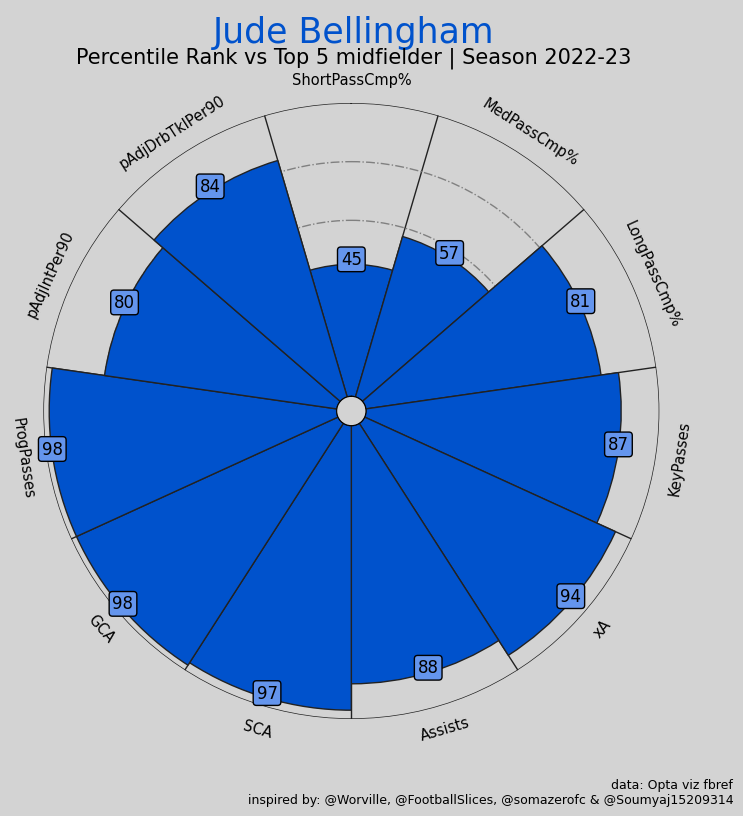

In [23]:
playerChart("Jude Bellingham")